### Import library

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Sanity check

In [3]:
titanic.shape

(891, 15)

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
titanic.isna().sum()*100/len(titanic)

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [6]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Nhận thấy ở đây cột age là một trong những cột thiếu dữ liệu và phải tìm cách điền vào.

## Xử lý thông tin Age bị thiếu.

### Data Distribution check

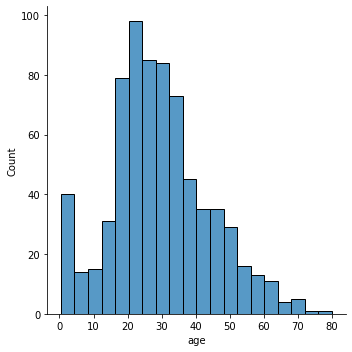

In [7]:
#Check Age distribution of 'age' columns
sns.displot(data=titanic, x ='age')
plt.show()

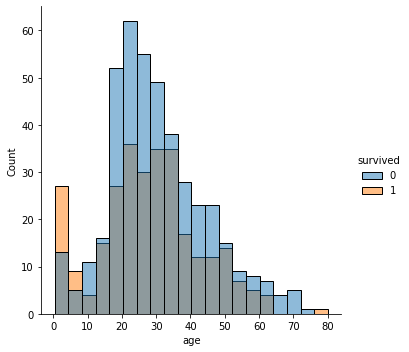

In [8]:
#check correlation between 'Age' and 'Survived'
sns.displot(data=titanic, x='age', hue='survived')
plt.show()

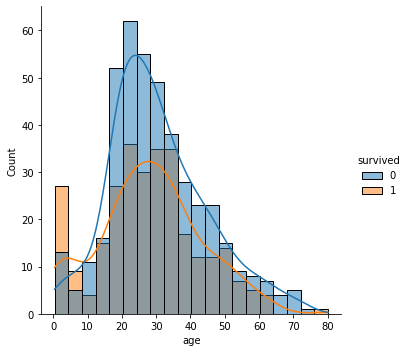

In [9]:
sns.displot(data=titanic, x='age', hue ='survived', kde = True)
plt.show()

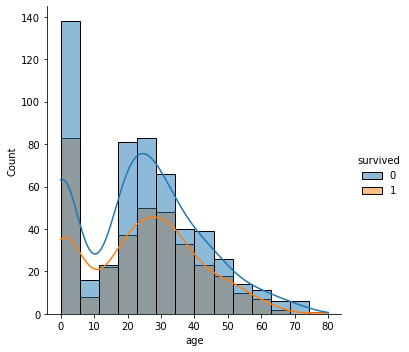

In [10]:
# if replate empty Age data by 0
sns.displot(data=titanic[['age','survived']].fillna(0), x='age', hue='survived', kde=True)
plt.show()

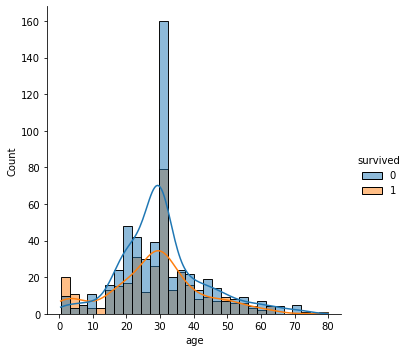

In [11]:
#Try with mean() value with emtpy age data
sns.displot(data=titanic[['age','survived']].fillna(titanic['age'].mean()), x='age', hue='survived', kde=True)
plt.show()

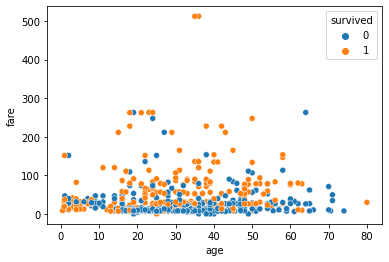

In [12]:
# Hypothesis I: correlation between Age with Fare. the higher Price they paid, the more chance to survive => False
sns.scatterplot(data = titanic, x='age', y='fare', hue='survived')
plt.show()

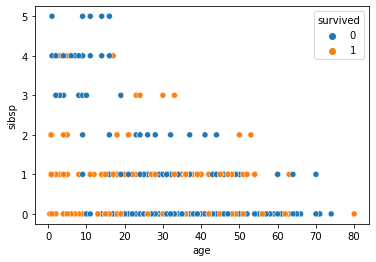

In [13]:
# Hypothesis II: Correlation between Age with sibsp
sns.scatterplot(data=titanic, x='age', y='sibsp', hue='survived')
plt.show()

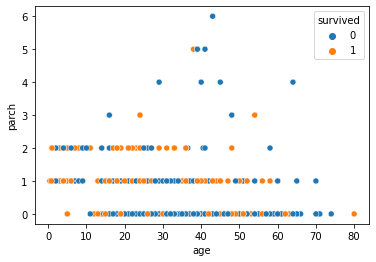

In [14]:
sns.scatterplot(data=titanic, x='age', y='parch', hue ='survived')
plt.show()

In [15]:
titanic['sibsp'].value_counts(), titanic['parch'].value_counts()

(0    608
 1    209
 2     28
 4     18
 3     16
 8      7
 5      5
 Name: sibsp, dtype: int64,
 0    678
 1    118
 2     80
 3      5
 5      5
 4      4
 6      1
 Name: parch, dtype: int64)

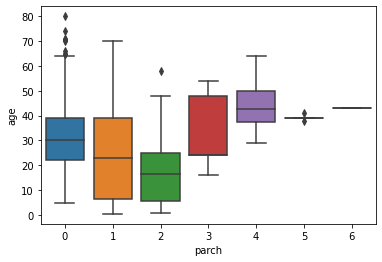

In [16]:
sns.boxplot(data=titanic, x= 'parch', y = 'age')
plt.show()

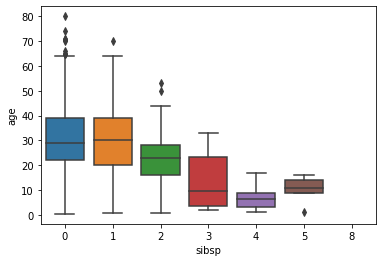

In [17]:
sns.boxplot(data=titanic, x= 'sibsp', y='age')
plt.show()

In [18]:
titanic.sex.unique()

array(['male', 'female'], dtype=object)

In [19]:
titanic.who.unique()

array(['man', 'woman', 'child'], dtype=object)

In [21]:
titanic.groupby(['who', 'sibsp', 'parch']).age.mean()
#tìm giá trị trung bình độ tuổi dựa vào 'who', 'sibsp', 'parch'

who    sibsp  parch
child  0      0        12.166667
              1         6.052500
              2         4.981111
       1      0        13.900000
              1         4.566667
              2         5.274286
       2      1         2.300000
              2         9.000000
       3      1         4.333333
              2         6.250000
       4      1         5.625000
              2         6.125000
       5      2         8.750000
man    0      0        32.973597
              1        38.583333
              2        35.800000
       1      0        32.701923
              1        36.000000
              2        30.750000
              3        16.000000
              4        52.000000
              5        39.000000
       2      0        31.181818
              1        23.000000
       3      1              NaN
              2        19.000000
       4      1        16.000000
       8      2              NaN
woman  0      0        31.084211
              1        

In [22]:
# Ngoài ra ta có thể thêm vào một số cột như số lượng bản ghi, số % giá trị trống bằng cách sử dụng hàm lambda
titanic.groupby(['who','sibsp','parch']).age.agg([len,'mean', lambda x: (x.isnull().sum()/len(x)*100)])
#lệnh này sử dụng hàm lambda với x đại diện cho các giá trị who, sibsp và parch
#giá trị mean ở đây là giá trị tính theo từng cụm who sibsp, parch


len       mean  <lambda_0>
who   sibsp parch                              
child 0     0        6.0  12.166667    0.000000
            1        8.0   6.052500    0.000000
            2        9.0   4.981111    0.000000
      1     0        5.0  13.900000    0.000000
            1       15.0   4.566667    0.000000
            2        7.0   5.274286    0.000000
      2     1        5.0   2.300000    0.000000
            2        1.0   9.000000    0.000000
      3     1        3.0   4.333333    0.000000
            2        4.0   6.250000    0.000000
      4     1        8.0   5.625000    0.000000
            2        8.0   6.125000    0.000000
      5     2        4.0   8.750000    0.000000
man   0     0      410.0  32.973597   26.097561
            1       12.0  38.583333    0.000000
            2        5.0  35.800000    0.000000
      1     0       59.0  32.701923   11.864407
            1       21.0  36.000000    9.523810
            2        5.0  30.750000   20.000000
            3        1.0  16.000000    0.000000
            4        2.0  52.000000    0.000000
            5        1.0  39.000000    0.000000
      2     0       13.0  31.181818   15.384615
            1        1.0  23.000000    0.000000
      3     1        1.0        NaN  100.000000
            2        1.0  19.000000    0.000000
      4     1        1.0  16.000000    0.000000
      8     2        4.0        NaN  100.000000
woman 0     0      121.0  31.084211   21.487603
            1       18.0  34.176471    5.555556
            2       15.0  26.833333   20.000000
            3        1.0  24.000000    0.000000
            4        1.0  29.000000    0.000000
            5        2.0  40.000000    0.000000
      1     0       59.0  33.355556   23.728814
            1       21.0  35.450000    4.761905
            2        7.0  31.333333   14.285714
            3        2.0  51.000000    0.000000
            4        1.0  45.000000    0.000000
            5        2.0  38.500000    0.000000
            6        1.0  43.000000    0.000000
      2     0        3.0  35.500000   33.333333
            1        1.0  24.000000    0.000000
            2        3.0  20.000000    0.000000
            3        1.0  24.000000    0.000000
      3     0        2.0  31.500000    0.000000
            1        3.0        NaN  100.000000
            2        2.0  23.500000    0.000000
      4     2        1.0  17.000000    0.000000
      5     2        1.0  16.000000    0.000000
      8     2        3.0        NaN  100.000000

In [23]:
ser = titanic.groupby(['who','sibsp','parch']).age.apply(lambda x: x.fillna(x.mean()))
ser
# apply cho phép thực hiện hàm lambda dọc theo trục của DataFrame
# ý nghĩa là tạo Series 'ser' lưu trữ các giá trị cũ của 'age' và fillna bằng giá trị trung bình của tuổi dựa dựa theo 'who', 'sibsp', 'parch'

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    31.333333
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [24]:
titanic['age'] = ser
#gán ser vào cột age trong bảng

In [25]:
#kiểm tra lại xem cột 'age' còn trống bao nhiêu thông tin nữa
titanic['age'].isnull().sum()

11

In [26]:
ser = titanic.groupby(['sibsp','parch']).age.apply(lambda x: x.fillna(x.mean()))
titanic['age'] = ser
titanic.age.isnull().sum()

7

In [27]:
#check lại thông tin giữa 'sibsp' ,'parch'
titanic.groupby(['sibsp', 'parch']).age.agg([len, 'mean', lambda x: x.isnull().sum()*100/len(x)])

len       mean  <lambda_0>
sibsp parch                              
0     0      537.0  32.315390         0.0
      1       38.0  29.647276         0.0
      2       29.0  21.597586         0.0
      3        1.0  24.000000         0.0
      4        1.0  29.000000         0.0
      5        2.0  40.000000         0.0
1     0      123.0  32.251148         0.0
      1       57.0  27.525439         0.0
      2       19.0  21.579123         0.0
      3        3.0  39.333333         0.0
      4        3.0  49.666667         0.0
      5        3.0  38.666667         0.0
      6        1.0  43.000000         0.0
2     0       16.0  31.991477         0.0
      1        7.0   8.357143         0.0
      2        4.0  17.250000         0.0
      3        1.0  24.000000         0.0
3     0        2.0  31.500000         0.0
      1        7.0   4.333333         0.0
      2        7.0  13.000000         0.0
4     1        9.0   6.777778         0.0
      2        9.0   7.333333         0.0
5     2        5.0  10.200000         0.0
8     2        7.0        NaN       100.0

ở trường hợp trên có 7 giá trị đang bị thất thoát là những người mà có đi cùng với 8 anh chị em và 2 người lớn.</br>
sác xuất ở đây 7 người này sẽ có khả năng là những người trẻ </br>
khá khó có thể tìm thấy 9 người trong cùng một gia đình đi trên cùng một chuyến tàu. --> xác suất thấp. </br>
nếu như mình coi đây là những người trẻ thì giá trị độ tuổi có thể gán cho 7 giá trị này là giá trị trung bình của những người trẻ tuổi. </br>

In [28]:
kid_avg_age = titanic[titanic['who']=='child'].age.mean()
#lọc theo cột who = child tính giá trị trung bình cột độ tuổi.

In [29]:
#fillna giá trị độ tuổi trung bình của child vào các giá trị na còn lại
titanic['age'] = titanic.age.fillna(kid_avg_age)

In [30]:
# kiểm tra lại giá trị trống
titanic['age'].isnull().sum()

0

## Xử lý thông tin cột Embarked

In [31]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [32]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [33]:
titanic['embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: embarked, dtype: int64

In [34]:
titanic[titanic['embarked'].isnull()] #lọc ra những dòng có embarked = null

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [35]:
#lọc người có giới tính nữ, sống sót, thương gia, xem họ xuất phát từ cảng nào. và nếu cảng nào có giá trị xuất hiện nhiều nhất thì điền giá trị đó vào giá trị trống này.

#cách1
filter1 = (titanic['survived']==1)
filter2 = (titanic['pclass']==1)
filter3 = (titanic['sex']=='female')
filter4 = (titanic['sibsp']==0)
filter5 = (titanic['parch']==0)

titanic[filter1 & filter2 & filter3 & filter4 & filter5]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
11,1,1,female,58.000000,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
61,1,1,female,38.000000,0,0,80.0000,NaN,First,woman,False,B,NaN,yes,True
194,1,1,female,44.000000,0,0,27.7208,C,First,woman,False,B,Cherbourg,yes,True
195,1,1,female,58.000000,0,0,146.5208,C,First,woman,False,B,Cherbourg,yes,True
218,1,1,female,32.000000,0,0,76.2917,C,First,woman,False,D,Cherbourg,yes,True
256,1,1,female,31.084211,0,0,79.2000,C,First,woman,False,NaN,Cherbourg,yes,True
257,1,1,female,30.000000,0,0,86.5000,S,First,woman,False,B,Southampton,yes,True
258,1,1,female,35.000000,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
269,1,1,female,35.000000,0,0,135.6333,S,First,woman,False,C,Southampton,yes,True
290,1,1,female,26.000000,0,0,78.8500,S,First,woman,False,NaN,Southampton,yes,True


In [36]:
# cách 2 dùng hàm query
ser = titanic.query("survived == 1 and pclass ==1 and sex == 'female' and sibsp ==0  and parch==0")
ser

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
11,1,1,female,58.000000,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
61,1,1,female,38.000000,0,0,80.0000,NaN,First,woman,False,B,NaN,yes,True
194,1,1,female,44.000000,0,0,27.7208,C,First,woman,False,B,Cherbourg,yes,True
195,1,1,female,58.000000,0,0,146.5208,C,First,woman,False,B,Cherbourg,yes,True
218,1,1,female,32.000000,0,0,76.2917,C,First,woman,False,D,Cherbourg,yes,True
256,1,1,female,31.084211,0,0,79.2000,C,First,woman,False,NaN,Cherbourg,yes,True
257,1,1,female,30.000000,0,0,86.5000,S,First,woman,False,B,Southampton,yes,True
258,1,1,female,35.000000,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
269,1,1,female,35.000000,0,0,135.6333,S,First,woman,False,C,Southampton,yes,True
290,1,1,female,26.000000,0,0,78.8500,S,First,woman,False,NaN,Southampton,yes,True


In [37]:
ser['embarked'].value_counts().idxmax()
#có thể dùng mode để tính giá trị nhiều nhất 
# ser['embarked'].mode()

'C'

In [38]:
titanic['embarked'] = titanic['embarked'].fillna('C')

In [39]:
titanic['embarked'].isna().sum()

0

In [40]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Xử lý thông tin cột Deck

xử lý mất mát với dữ liệu có 2 cách
Cách 1 Direct: không cần phải xử lý gì với cột dữ liệu đó mà truyền thẳng vào trong mô hình. mô hình đó hỗ trợ việc xử lý dữ liệu thất thoát (decision tree, random forest..)

Cách 2 Indirect: thông thường cách này sẽ dành cho những thuật toán mà không có cơ chế để xử lý việc thất thoát dữ liệu.
* Có thể remove luôn cột dữ liệu đang bị thiếu - hãn hữu sử dụng cách này.
* Nếu không loại bỏ được. thì phải tìm cách thay thế dữ liệu hoặc điền vào dữ liệu (impute)
* Khi điền giá trị chúng ta có thể sử dụng các giá trị mean, median, mode,... điền các giá trị scaler hoặc hằng số nào đấy. --> fillna()
* Kết hợp hành vi của những cụm feature lân cân, và từ những hành vi đó có thể đưa ra kết luận với từng giá trị bị thất thoát. (domain expertise)
* Dựa vào mô hình khác để dự đoán giá trị thất thoát đó là bao nhiêu (1-nn)

Cách thứ 2 thồng thường sẽ sử dụng hành vi kết hợp với cụm feature hoặc dựa vào mô hình học máy khác (3,4) để làm nhiều hơn.


In [41]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [42]:
titanic.pivot_table(index='deck', 
                    columns='pclass',
                    values = 'survived',
                    aggfunc='count'
                    )

pclass,1,2,3
deck,,,
A,15,0,0
B,47,0,0
C,59,0,0
D,29,4,0
E,25,4,3
F,0,8,5
G,0,0,4


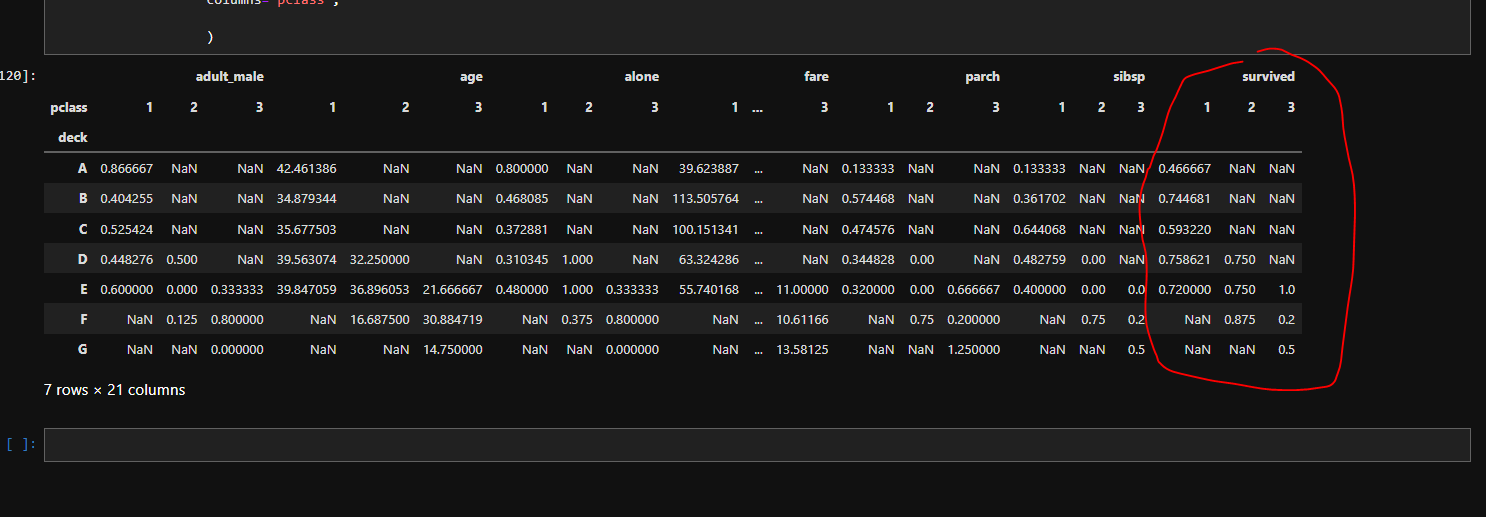

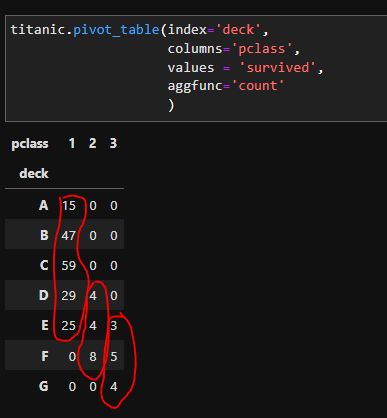</br>
Nhận thấy rằng ở đấy 1st class sẽ luôn tập trung ở khoang A,B,C,D và các vé hạng 2 sẽ luôn tập trung ở D,E,F. vé hàng 3 luôn tập trung ở E,F,G

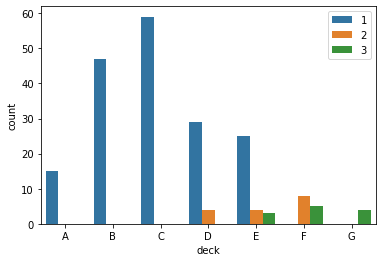

In [43]:
sns.countplot(data=titanic, x='deck', hue = 'pclass')
plt.legend(loc='upper right')
plt.show()

In [44]:
# Hypothesis
# Nếu như người nào có pclass = 1 thì sẽ gán ở giá trị C
# Nếu như người nào có pclass = 2 hoặc 3 thì sẽ gán giá trị F
deck_dict = {1: 'C', 2: 'F', 3: 'F'}
ser = titanic['pclass'].map(deck_dict)
ser

0      F
1      C
2      F
3      C
4      F
      ..
886    F
887    C
888    F
889    C
890    F
Name: pclass, Length: 891, dtype: object

In [45]:
# Gán giá trị từ ser vào trong cột deck. nếu như deck có giá trị rồi thì bỏ qua và chỉ thay thế với na bằng ô tương ứng bên ser
new_deck = titanic['deck'].combine_first(ser)
new_deck

0      F
1      C
2      F
3      C
4      F
      ..
886    F
887    B
888    F
889    C
890    F
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [46]:
titanic['deck'].isnull().sum()

688

In [47]:
titanic['deck'].value_counts(dropna=False)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

In [48]:
titanic['deck'] = titanic['deck'].fillna(ser)

In [49]:
titanic['deck'].isna().sum()

0

In [50]:
titanic['deck'].value_counts()

F    660
C    100
B     47
D     33
E     32
A     15
G      4
Name: deck, dtype: int64

In [51]:
titanic.isna().sum()
#Trong bảng dưới đây ta thấy embarked và embarked town có giá trị sử dụng tương đương như nhau. do vậy có thể bỏ cột embark_town đi được.

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

Các bước xử lý dữ liệu </br>
DATA --> EDA --> Feature Engineering --> Feature Selection --> model</br>

* EDA: Exploratory Data Analysis - nghiên cứu dữ liệu </br>
* Feature Engineering: làm sạch dữ liệu, lọc nhiễu và điền thêm dữ liệu, tạo các bộ biến cần thiết, có ý nghĩa, feature scaling hay feature normalization.
* Feature Selection: lựa chọn Feature có ý nghĩa để đưa vào mô hình.


## Feature Engineering

Thông thường với độ tuổi thì hay được phân cụm và nhóm lại. và có một cụm từ để mô tả </br>
**Discretization**
- Đối với bài toán **Supervised** có 2 cách để tiếp cận:
    - Equal-width discretization sử dụng hàm `pd.cut()`
    - Equal-frequent discretization sử dụng hàm `pd.qcut()`
- Đối với bài toán **Unsupervised** tiếp cận bằng cách:
    - Entropy-base discretization


Equal-width về bản chất sẽ là chia chuỗi giá trị thành cách nhóm bằng nhau

In [52]:
titanic.age.describe()

count    891.000000
mean      29.945476
std       13.342194
min        0.420000
25%       22.000000
50%       31.084211
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [53]:
age_group=[0, 15,25,35,45,60,80,100]
pd.cut(titanic.age, bins= age_group)
#phân khoảng nhóm

0      (15, 25]
1      (35, 45]
2      (25, 35]
3      (25, 35]
4      (25, 35]
         ...   
886    (25, 35]
887    (15, 25]
888    (25, 35]
889    (25, 35]
890    (25, 35]
Name: age, Length: 891, dtype: category
Categories (7, interval[int64]): [(0, 15] < (15, 25] < (25, 35] < (35, 45] < (45, 60] < (60, 80] < (80, 100]]

In [54]:
titanic['age_group'] = pd.cut(titanic.age, bins= age_group)
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,F,Southampton,no,False,"(15, 25]"
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"(35, 45]"
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,F,Southampton,yes,True,"(25, 35]"
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"(25, 35]"
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,F,Southampton,no,True,"(25, 35]"


In [55]:
# Hypothesis: liệu rằng những người phụ nữ giàu có có khả năng sống sót cao?
# titanic['rich_women'] lọc theo kiểu: sử dụng vé hạng sang, và phải là phụ nữ
titanic['rich_women'] = (titanic['sex'] == 'female') & (titanic['pclass'] == 1)
titanic['rich_women']

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889    False
890    False
Name: rich_women, Length: 891, dtype: bool

In [56]:
titanic['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

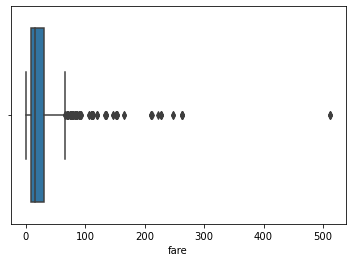

In [57]:
sns.boxplot(data=titanic, x='fare')
plt.show()

### Note: Practice Feature scaling with `fare`

In [58]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,rich_women
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,F,Southampton,no,False,"(15, 25]",False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"(35, 45]",True
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,F,Southampton,yes,True,"(25, 35]",False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"(25, 35]",True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,F,Southampton,no,True,"(25, 35]",False


In [59]:
#Biến đổi dữ liệu
# map biến đổi male = 0, female =1 
sex_dict={'male': 0, 'female': 1}
titanic[''] = titanic['sex'].map(sex_dict)

Ngoài việc sử dụng hàm map thì còn có thể sử dụng hàm equal `eq`

In [60]:
titanic['sex'] = titanic['sex'].eq('female').astype(int)
# cấu trúc này có thể giống trong pyspark

In [61]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,rich_women,
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,F,Southampton,no,False,"(15, 25]",False,0
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"(35, 45]",True,1
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,F,Southampton,yes,True,"(25, 35]",False,1
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"(25, 35]",True,1
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,F,Southampton,no,True,"(25, 35]",False,0


In [62]:
titanic.deck.value_counts()
#gộp nhóm rời rạc sparse class grouping

F    660
C    100
B     47
D     33
E     32
A     15
G      4
Name: deck, dtype: int64

In [63]:
ser = titanic['deck'].map({'A': 1,
                          'B':1,
                          'C':1,
                          'D':0,
                          'E':0,
                          'F':0,
                          'G':0})
ser
# phân loại nhóm dữ liệu của cột deck 
# phân hàng a,b,c là hạng 1, d, e, f, g là hạng 2

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: deck, Length: 891, dtype: int64

In [64]:
titanic['new_deck'] = ser

In [65]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,rich_women,,new_deck
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,F,Southampton,no,False,"(15, 25]",False,0,0
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"(35, 45]",True,1,1
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,F,Southampton,yes,True,"(25, 35]",False,1,0
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"(25, 35]",True,1,1
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,F,Southampton,no,True,"(25, 35]",False,0,0


In [66]:
# Boolean into int
for col in ['adult_male','alone','rich_women']:
    titanic[col] = titanic[col].astype(int)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,rich_women,,new_deck
0,0,3,0,22.000000,1,0,7.2500,S,Third,man,1,F,Southampton,no,0,"(15, 25]",0,0,0
1,1,1,1,38.000000,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,0,"(35, 45]",1,1,1
2,1,3,1,26.000000,0,0,7.9250,S,Third,woman,0,F,Southampton,yes,1,"(25, 35]",0,1,0
3,1,1,1,35.000000,1,0,53.1000,S,First,woman,0,C,Southampton,yes,0,"(25, 35]",1,1,1
4,0,3,0,35.000000,0,0,8.0500,S,Third,man,1,F,Southampton,no,1,"(25, 35]",0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,S,Second,man,1,F,Southampton,no,1,"(25, 35]",0,0,0
887,1,1,1,19.000000,0,0,30.0000,S,First,woman,0,B,Southampton,yes,1,"(15, 25]",1,1,1
888,0,3,1,31.333333,1,2,23.4500,S,Third,woman,0,F,Southampton,no,0,"(25, 35]",0,1,0
889,1,1,0,26.000000,0,0,30.0000,C,First,man,1,C,Cherbourg,yes,1,"(25, 35]",0,0,1


In [67]:
# xử lý phần age_group
titanic.age_group.value_counts()

(25, 35]     358
(15, 25]     218
(35, 45]     118
(0, 15]       94
(45, 60]      81
(60, 80]      22
(80, 100]      0
Name: age_group, dtype: int64

In [71]:
#sử dụng erplace() hoặc strip()
# thay đổi từ (25,35] thành dạng 25_35
titanic['age_group']=titanic['age_group'].astype(str).str.strip('([])').str.replace(', ','_')

In [74]:
#tạo ra các cột dữ liệu dummie
dummies = pd.get_dummies(titanic[['age_group','embarked','who']])

In [76]:
#join 2 bảng titanic và dummies
titanic_new = titanic.join(dummies)
titanic_new
#có thể sử dụng hàm merge(on=, how=) như đã học trong level 1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,age_group_25_35,age_group_35_45,age_group_45_60,age_group_60_80,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
0,0,3,0,22.000000,1,0,7.2500,S,Third,man,...,0,0,0,0,0,0,1,0,1,0
1,1,1,1,38.000000,1,0,71.2833,C,First,woman,...,0,1,0,0,1,0,0,0,0,1
2,1,3,1,26.000000,0,0,7.9250,S,Third,woman,...,1,0,0,0,0,0,1,0,0,1
3,1,1,1,35.000000,1,0,53.1000,S,First,woman,...,1,0,0,0,0,0,1,0,0,1
4,0,3,0,35.000000,0,0,8.0500,S,Third,man,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,S,Second,man,...,1,0,0,0,0,0,1,0,1,0
887,1,1,1,19.000000,0,0,30.0000,S,First,woman,...,0,0,0,0,0,0,1,0,0,1
888,0,3,1,31.333333,1,2,23.4500,S,Third,woman,...,1,0,0,0,0,0,1,0,0,1
889,1,1,0,26.000000,0,0,30.0000,C,First,man,...,1,0,0,0,1,0,0,0,1,0


### Train model

In [77]:
#loại bỏ các cột dữ liệu mà mình không cần nữa
titanic_new.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'age_group', 'rich_women', '', 'new_deck',
       'age_group_0_15', 'age_group_15_25', 'age_group_25_35',
       'age_group_35_45', 'age_group_45_60', 'age_group_60_80', 'embarked_C',
       'embarked_Q', 'embarked_S', 'who_child', 'who_man', 'who_woman'],
      dtype='object')

In [82]:
#titanic_new = titanic_new.drop(columns=['sex','age','fare','age_group','embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive','alone'])
titanic_new.head(5)

,survived,pclass,sibsp,parch,rich_women,,new_deck,age_group_0_15,age_group_15_25,age_group_25_35,age_group_35_45,age_group_45_60,age_group_60_80,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
0,0,3,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,1,1,1,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,1
2,1,3,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1
3,1,1,1,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,1
4,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [85]:
from sklearn.model_selection import train_test_split
xdata = titanic_new.drop(columns=['survived'])
ydata = titanic_new['survived']
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size=0.2, random_state=42)

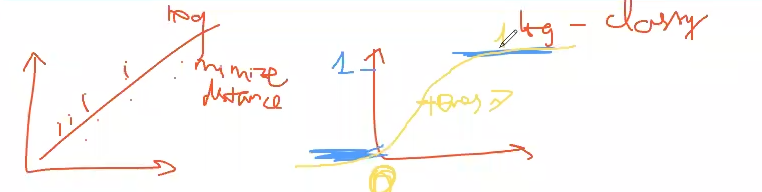

In [86]:
#sử dụng cơ chế 3 bước:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [92]:
clf.fit(xtrain, ytrain)
y_pred = clf.predict(xtest)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [97]:
# có thể kiểm tra lại xem tỉ lệ đúng là bao nhiêu bằng cách so sánh y_pred vs ytest
(y_pred == ytest).sum()/len(ytest)*100
# bản y_pred có độ chính xác là 83.24%

83.24022346368714

In [98]:
#trong thư viện của sklearn thì cũng có môt hàm để đo độ chính xác của mô hình học máy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [99]:
#thử với Accuracy_score.
accuracy_score(ytest, y_pred) #truyền vào giá trị groundtruth và giá trị predict

0.8324022346368715

In [103]:
cf_matrix = confusion_matrix(ytest,y_pred)


Cơ chế hoạt động của confusion_matric </br>
92: true negative: những người thực sự chết / mô hình dự đoán đúng là chết</br>
13: những người thực tế chết / mô hình dự đoán còn sống</br>
17: false negative: những người thực sự còn sống / mô hình dự đoán đã chết</br>
57: true positive: nhưng người thực sự còn số / mô hình dự đoán còn sống</br>
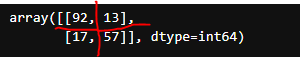

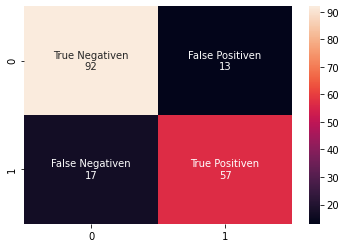

In [111]:

name= ['True Negative', 'False Positive', 'False Negative', 'True Positive']
labels = np.asarray([f'{i}n\n{j}' for i,j in zip(name, cf_matrix.flatten())])
sns.heatmap(cf_matrix, annot=labels.reshape(2,2), fmt='')
plt.show()

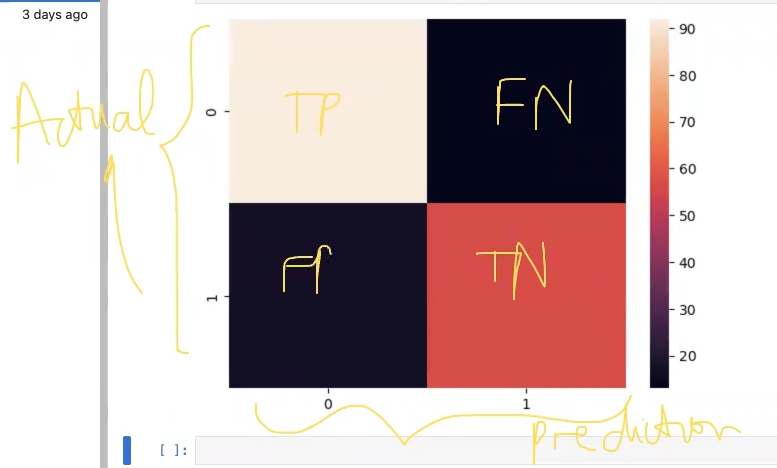

Từ đây chúng ta có thể xây dựng được một số metric như sau </br>
* Accuracy = (True Positive + True Negative)/ (True Positive + False Negative + False Positive + True Negative)
* Precision = TP / ( TP + FP)
* Recall = TP / (TP + FP
* F1_Score = 1/2 * (Precision * Recall) / (Precision + Recall)
để shows được các thông số này có thể sử dụng classification_report



In [109]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179

